In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('GSAF5.csv',sep=',', engine='python')

In [3]:
'''Vemos el tamaño del dataset'''

df.shape

(5992, 24)

In [4]:
'''Vemos la informacion de la tabla para entender los nombres de las columnas y el data type de cada una de ellas'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [5]:
'''Miramos cuales son aquellas columnas que tienen mayor cantidad de valores nulos'''

null_cols=df.isnull().sum()
null_cols[null_cols>0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [6]:
'''Podemos ver que las columnas Unnamed: 22 y Unnamed: 23 solo tienen 1 y 2 datos. 
Los consideramos un error asi que los borramos. 
Una manera de hacerlo es indicando que borremos aquellas columnas con mas de 4000 valores nulos'''

drop_cols=list(null_cols[null_cols>4000].index)
df=df.drop(drop_cols,axis=1)
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [7]:
'''Corregimos los espacios que tienen las columnas Sex y Species y aquellas que tienen un " ", le ponemos un _'''

df=df.rename(columns={"Sex ": "Sex", "Species ": "Species","Case Number": "Case_Number","Fatal (Y/N)": "Fatal_Injury","Investigator or Source": "Investigator_or_Source","original order": "Original_Order"})
df.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_Injury', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Original_Order'],
      dtype='object')

In [8]:
'''Hemos comprobado  las columnas con titulo parecido que son practicamente iguales, 
mantenemos un href ya que tiene la informacion completa en formato pdf y puede ser util consultarlo
Case_Number.1
Case_Number.2
Case_Number
href formula
href'''

'Hemos comprobado  las columnas con titulo parecido que son practicamente iguales, \nmantenemos un href ya que tiene la informacion completa en formato pdf y puede ser util consultarlo\nCase_Number.1\nCase_Number.2\nCase_Number\nhref formula\nhref'

In [9]:
'''Vemos que casi todas las columnas son non-null object 
asi que cambiamos el dtype de la columna Year y original order para tenerlo 
todo en texto y poder manipular/comparar mejor'''

df['Year']=df['Year'].apply(str)
df['Original_Order']=df['Original_Order'].apply(str)

In [10]:
'''Mirar columnas Species y Injury, 
ya que parecen dos columnas de campo abierto con lo que dificilmente seran utiles'''

'Mirar columnas Species y Injury, \nya que parecen dos columnas de campo abierto con lo que dificilmente seran utiles'

In [11]:
'''Mirar informacion de un pdf'''

df['pdf'][0]

'2016.09.18.c-NSB.pdf'

In [12]:
'''Mirar informacion de un pdf'''

df['href formula'][0]

'http://sharkattackfile.net/spreadsheets/pdf_directory/2016.09.18.c-NSB.pdf'

In [13]:
'''Eliminamos aquellas columnas repetidas o que creemos que no van a tener sentido utilizar para nuestro analisis'''

drop_list = ['pdf', 'href formula','Case Number.1',
             'Case Number.2','Original_Order','Species','Injury','Investigator_or_Source','Name']


In [14]:
df=df.drop(drop_list,axis=1)

In [15]:
df.head(2)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal_Injury,Time,href
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,N,13h00,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,N,11h00,http://sharkattackfile.net/spreadsheets/pdf_di...


In [16]:
df.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal_Injury', 'Time', 'href'],
      dtype='object')

In [17]:
'''Como vamos a trabajar con textos cambiamos
 los na values por "Unknown" para que sea de mas facil visualizacion '''

df=df.fillna(value='Unknown')

In [18]:
df.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal_Injury', 'Time', 'href'],
      dtype='object')

In [19]:
'''Utilizamos value_counts para ver cuales son los valores que mas se repiten en cada columna'''

pd.value_counts(df['Activity'])

Surfing                                         904
Swimming                                        819
Unknown                                         530
Fishing                                         414
Spearfishing                                    321
                                               ... 
Fell overboard?                                   1
Crawling                                          1
Spearfishing & holding catch                      1
Netting pilchards                                 1
Attempted to return injured shark to the sea      1
Name: Activity, Length: 1492, dtype: int64

In [20]:
'''Despues de ver con value_counts cuales son los valores 
que mas se repiten en algunas columnas hacemos algunas limpiezas especificas'''


columns=['Fatal_Injury']

for column in columns:
    df[column] = df[column].str.replace(" ","")
    df[column] = df[column].str.replace("n","N")
    df[column] = df[column].str.replace("F","Y")
    df[column] = df[column].str.capitalize()

In [21]:
columns=['Time']

for column in columns:
    df[column] = df[column].str.capitalize()
    df[column] = df[column].str.replace("Late","")
    df[column] = df[column].str.replace("late","")
    df[column] = df[column].str.replace("Early","")
    df[column] = df[column].str.replace("Mid","")
    df[column] = df[column].str.replace("Between","")
    df[column] = df[column].str.replace("Just Before","")
    df[column] = df[column].str.replace("Before","")
    df[column] = df[column].str.replace("After","")
    
    df[column] = df[column].str.capitalize()

In [22]:
columns=['Sex']

for column in columns:
    df[column] = df[column].str.replace("M ","M")
    df[column] = df[column].str.replace(".","Unknown")
    df[column] = df[column].str.replace("Lli","Unknown")
    df[column] = df[column].str.replace("N","Unknown")
    df[column] = df[column].str.capitalize()

pd.value_counts(df['Sex'])

M          4837
F           585
Unknown     569
Lli           1
Name: Sex, dtype: int64

In [23]:
columns=['Date']

for column in columns:
    df[column] = df[column].str.replace("Before","")
    df[column] = df[column].str.replace("Reported","")
    df[column] = df[column].str.replace("reported","")
    df[column] = df[column].str.replace("Late","")
    df[column] = df[column].str.replace("Early","")
    df[column] = df[column].str.replace("Summer","")

In [24]:
'''Hacemos una limpieza general de los textos para eliminar 
todos aquellos caracteres que no son alfanumericos 
y aquellos espacios al inicio del texto
Eliminamos tambien aquellos dobles y triples espacios
Por ultimo utilizamos capitalize para dar mejor formato y estructura al texto'''

def get_num(string_num):
    return re.findall('\d+',string_num)

def split_it(string):
    return re.sub(r'[^\w]',' ', string)

def beg_white(string):
    return re.sub(r'^[ \t]+','', string)


In [25]:
for column in df.columns:
    if  column == ('Year' or 'Sex'):
        next
    else:
        df[column] = df[column].apply(lambda x: split_it(x))
        df[column] = df[column].str.replace("  "," ")
        df[column] = df[column].str.replace("   "," ")
        df[column] = df[column].apply(lambda x: beg_white(x))        
        df[column] = df[column].str.capitalize()

In [26]:
'''Para simplificar los datos e intentar unificar 
aquellos que mas se repiten y poder estandarizar 
la informacion utilizamos el siguiente for loop para 
que aquellos campos que empiezan con los textos que mas se repitan solo mantenga ese inicio'''

for column in df.columns:
    print(column)
    if  column == 'Year':
        next
    else:
        list_top_25 = df[column].value_counts().index[:25].tolist()
        print(list_top_25)
        for value in list_top_25:
            df.loc[df[column].str.startswith(value),column]=value
            

Case_Number
['1962 06 11 b', '1907 10 16 r', '2013 10 05', '1915 07 06 a r', '1983 06 15', '1923 00 00 a', '2006 09 02', '1980 07 00', '2012 09 02 b', '1990 05 10', '2009 12 18', '1920 00 00 b', '2005 04 06', '1913 08 27 r', '2014 08 02', '1966 12 26', '1992 02 14', '1989 11 12', '1981 05 20', '1956 12 24', '2013 04 02 r', '1971 10 23', '1959 09 26 a', '1905 09 29', '1963 09 22']
Date
['1958', '1957', '1942', '1956', '1950', '1941', '1949', 'No date', '1970s', '1960s', 'Aug 56', '1938', '1876', '1954', '28 jul 95', '05 oct 03', '1960', '12 apr 01', '1898', '1959', '1940', 'Oct 60', '1961', '1955', 'No date  1963']
Year
Type
['Unprovoked', 'Provoked', 'Invalid', 'Sea disaster', 'Boat', 'Boating']
Country
['Usa', 'Australia', 'South africa', 'Papua new guinea', 'New zealand', 'Brazil', 'Bahamas', 'Mexico', 'Italy', 'Fiji', 'Philippines', 'Reunion', 'New caledonia', 'Mozambique', 'Unknown', 'Cuba', 'Spain', 'India', 'Egypt', 'Croatia', 'Japan', 'Panama', 'Iran', 'Solomon islands', 'Greece

In [27]:
pd.value_counts(df['Activity'])

Swimming                                     1019
Surfing                                       944
Fishing                                       594
Unknown                                       532
Spearfishing                                  394
                                             ... 
Pacific seafarer of us navy                     1
Vehicle plunged over cliff into the water       1
Sittting in water with his child                1
Attempting to retreive a dinghy                 1
Restraining a beached shark                     1
Name: Activity, Length: 846, dtype: int64

In [28]:
'''Tanto en las columnas Case_Number como Date 
tenemos datos de fechas, y como casi siempre sigue 
la misma estructura podemos hacer un split para 
luego quedarnos con los datos que mas nos interesan'''

df[['Year_Date','Month_Date','Date_Date']] = pd.DataFrame(df.Date.str.split(' ',2).tolist(),columns =['Y_D','M_D','D_D'])
df[['Year_Case','Month','Date_Case','Case_Case']] = pd.DataFrame(df.Case_Number.str.split(' ',3).tolist(),columns =['Y_C','M_C','D_C','C_C'])


In [29]:
'''Una vez hecho el split eliminamos aquellas columnas que no nos interesan'''

drop_cols2=['Year_Case','Date_Case','Case_Case']
df=df.drop(drop_cols2,axis=1)
df.head(2)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal_Injury,Time,href,Year_Date,Month_Date,Date_Date,Month
0,2016 09 18 c,18 sep 16,2016,Unprovoked,Usa,Florida,New smyrna beach volusia county,Surfing,M,16,N,13h00,Http sharkattackfile net spreadsheets pdf_dir...,18,sep,16,09
1,2016 09 18 b,18 sep 16,2016,Unprovoked,Usa,Florida,New smyrna beach volusia county,Surfing,M,36,N,11h00,Http sharkattackfile net spreadsheets pdf_dir...,18,sep,16,09


In [30]:
'''Tanto en las columnas Year Year_Date tenemos años
y para segun que filas tenemos datos en una columna
y no en la otra asi que cuando el valor es 0 en la 
columna miramos si en la otra existe un valor y lo unificamos'''

df['Year'].replace('0',df['Year_Date'],inplace=True)


'''Una vez utilizas las columnas las eliminamos'''

drop_cols3=['Year_Date','Month_Date','Date_Date']
df=df.drop(drop_cols3,axis=1)

In [31]:
#pd.options.display.max_rows=None

In [32]:
'''Nos interesa sacar las horas para aquellas 
celads que lo tenemos aunque sean pocsa'''

df[['Hour','Minute']] = pd.DataFrame(df.Time.str.split('h',1).tolist(),columns =['hour','minute'])
df['Hour'] = df['Hour'].str.capitalize()
df['Hour'] = df['Hour'].apply(lambda x: beg_white(x)) 
df['Hour2'] = df['Hour'].str.capitalize()

In [33]:
'''Como tenemos muy pocos datos de horas, 
para poder aprovecharlos y poder analizarlos 
los agrupamos segun las horas del dia. hay datos que ya tenian estas categorias asi que unificamos.'''

df['Hour2'] = df['Hour2'].str.replace('Nig','Night')

df['Hour2'] = df['Hour2'].str.replace('00','Night')
df['Hour2'] = df['Hour2'].str.replace('01','Night')
df['Hour2'] = df['Hour2'].str.replace('02','Night')
df['Hour2'] = df['Hour2'].str.replace('03','Night')
df['Hour2'] = df['Hour2'].str.replace('04','Night')
df['Hour2'] = df['Hour2'].str.replace('05','Morning')
df['Hour2'] = df['Hour2'].str.replace('06','Morning')
df['Hour2'] = df['Hour2'].str.replace('07','Morning')
df['Hour2'] = df['Hour2'].str.replace('08','Morning')
df['Hour2'] = df['Hour2'].str.replace('09','Morning')
df['Hour2'] = df['Hour2'].str.replace('10','Morning')
df['Hour2'] = df['Hour2'].str.replace('11','Noon')
df['Hour2'] = df['Hour2'].str.replace('12','Noon')
df['Hour2'] = df['Hour2'].str.replace('13','Noon')
df['Hour2'] = df['Hour2'].str.replace('14','Noon')
df['Hour2'] = df['Hour2'].str.replace('15','Afternoon')
df['Hour2'] = df['Hour2'].str.replace('16','Afternoon')
df['Hour2'] = df['Hour2'].str.replace('17','Afternoon')
df['Hour2'] = df['Hour2'].str.replace('18','Afternoon')
df['Hour2'] = df['Hour2'].str.replace('19','Evening')
df['Hour2'] = df['Hour2'].str.replace('20','Evening')
df['Hour2'] = df['Hour2'].str.replace('21','Evening')
df['Hour2'] = df['Hour2'].str.replace('22','Evening')
df['Hour2'] = df['Hour2'].str.replace('23','Evening')

In [34]:
'''Estructuramos de una forma mas visual la informacion sobre los meses que tenemos'''

columns=['Month']

for column in columns:
    df.loc[(df[column].str.len()>2)|(df[column]=='00') ,column]='Unknown'
    df[column] = df[column].str.replace("01","January")
    df[column] = df[column].str.replace("02","February")
    df[column] = df[column].str.replace("03","March")
    df[column] = df[column].str.replace("04","April")
    df[column] = df[column].str.replace("05","May")
    df[column] = df[column].str.replace("06","June")
    df[column] = df[column].str.replace("07","July")
    df[column] = df[column].str.replace("08","August")
    df[column] = df[column].str.replace("09","Septembrer")
    df[column] = df[column].str.replace("10","October")
    df[column] = df[column].str.replace("11","November")
    df[column] = df[column].str.replace("12","December")


In [35]:
'''Para la columna Age aplicamos regex para solo quedarnos con el primer valor numerico que aparezca'''

df['Age'] = df['Age'].apply(lambda x: get_num(x))

count=0
for i in df['Age']:
    if len(i)==0:
        df['Age'][count]='Unknown'
    else:
        df['Age'][count]=i[0]
    count+=1  

In [36]:
df=df.rename(columns={"Hour2": "Time_Day"})
df.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal_Injury', 'Time', 'href', 'Month',
       'Hour', 'Minute', 'Time_Day'],
      dtype='object')

In [37]:
'''Finalmente visualizamos algunos de los datos obtenids tras el limpiado'''

countries = df.groupby('Country', as_index=False)['Case_Number'].count()
countries.sort_values(by=['Case_Number'], ascending=False).head(15)

,Country,Case_Number
184,Usa,2116
10,Australia,1279
153,South africa,565
131,Papua new guinea,133
113,New zealand,125
20,Brazil,102
12,Bahamas,98
100,Mexico,82
78,Italy,72
53,Fiji,65


In [38]:
Activity = df.groupby('Activity', as_index=False)['Case_Number'].count()
Activity.sort_values(by=['Case_Number'], ascending=False).head(15)

,Activity,Case_Number
713,Swimming,1019
706,Surfing,944
294,Fishing,594
783,Unknown,532
676,Spearfishing,394
237,Diving,216
102,Bathing,174
791,Wading,161
690,Standing,128
609,Scuba diving,113


In [39]:
Month = df.groupby('Month', as_index=False)['Case_Number'].count()
Month.sort_values(by=['Case_Number'], ascending=False).head(13)

,Month,Case_Number
5,July,634
1,August,580
11,Septembrer,524
12,Unknown,522
4,January,500
6,June,474
2,December,423
0,April,410
10,October,407
7,March,398


In [40]:
df.head(2)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal_Injury,Time,href,Month,Hour,Minute,Time_Day
0,2016 09 18 c,18 sep 16,2016,Unprovoked,Usa,Florida,New smyrna beach volusia county,Surfing,M,16,N,13h00,Http sharkattackfile net spreadsheets pdf_dir...,Septembrer,13,00,Noon
1,2016 09 18 b,18 sep 16,2016,Unprovoked,Usa,Florida,New smyrna beach volusia county,Surfing,M,36,N,11h00,Http sharkattackfile net spreadsheets pdf_dir...,Septembrer,11,00,Noon


In [41]:
df.to_csv('data_cleaned_sharks.csv')

In [42]:
'''Con la limpieza que hemos hecho ahora 
en las columnas siguientes tenemos 
datos limpiados que nos pueden servir para hacer estudios


Posibles analysis estadisticos a realizar:

1. Cuando ocurren la mayoria de los accidentes? Cuales de estos son fatales?
2. Que paises son los que tienen mas accidentes Fatales?
3. Bajo que actividad ocurren la moayoria de Fatal_Injuries?
4. Cuales son los meses en los que mas accidentes hay? 
Aqui tener cuidado pq no tenemos la misma gente en el agua todos los meses
5. Histograma de evolucion de registros por año y mes.
6. Analisis % de los ultimos años que son los que tenemos mas datos.
    Ejemplo: % de los accidentes registrados en un año ocurren en cada pais.
...
'''

st_analysis=df[['Year','Month','Time_Day','Country','Activity','Sex','Fatal_Injury','Age']]

st_analysis.to_csv('data_for_analysis_cleaned_sharks.csv')

#pd.options.display.max_rows=None
st_analysis

,Year,Month,Time_Day,Country,Activity,Sex,Fatal_Injury,Age
0,2016,Septembrer,Noon,Usa,Surfing,M,N,16
1,2016,Septembrer,Noon,Usa,Surfing,M,N,36
2,2016,Septembrer,Morning,Usa,Surfing,M,N,43
3,2016,Septembrer,Unknown,Australia,Surfing,M,N,Unknown
4,2016,Septembrer,Unknown,Australia,Surfing,M,N,Unknown
...,...,...,...,...,...,...,...,...
5987,1903,Unknown,Unknown,Australia,Diving,M,Y,Unknown
5988,1903,Unknown,Unknown,Australia,Pearl diving,M,Y,Unknown
5989,1900,Unknown,Unknown,Usa,Swimming,M,Y,Unknown
5990,1883,Unknown,Unknown,Panama,Unknown,M,Y,Unknown


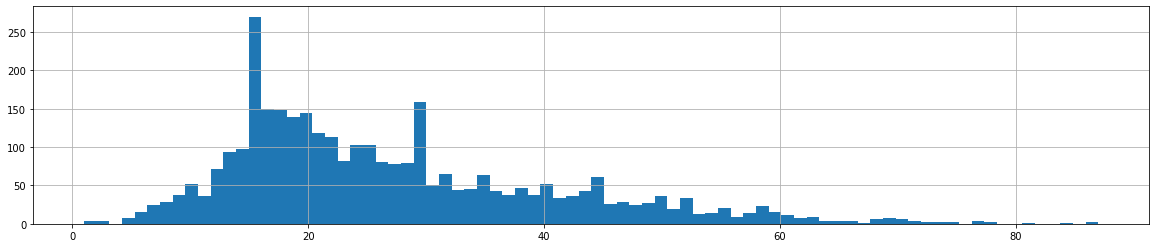

In [43]:
'''Por ultimo hacemos algunas visualizacions de los campos numericos para entender las distribuciones
1. En este primer histograma podemos ver la distribucion de accidentes segun la edad
2. En el segundo podemos ver el registro de accidentes por año. Como era de esperar en los ultimos años
    se han documentado mas accidentes (eso no significa que hayan habido mas)'''

df3=df.sort_values(by=['Age'])
df3['Age'] = df['Age'].str.replace("Unknown","0")
df3.drop(df3[ df3['Age'] == '0' ].index , inplace=True)
df3=df3['Age'].astype(int)

histograma = df3.hist(bins=80,figsize=(20,4))
histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c64d810>]],
      dtype=object)

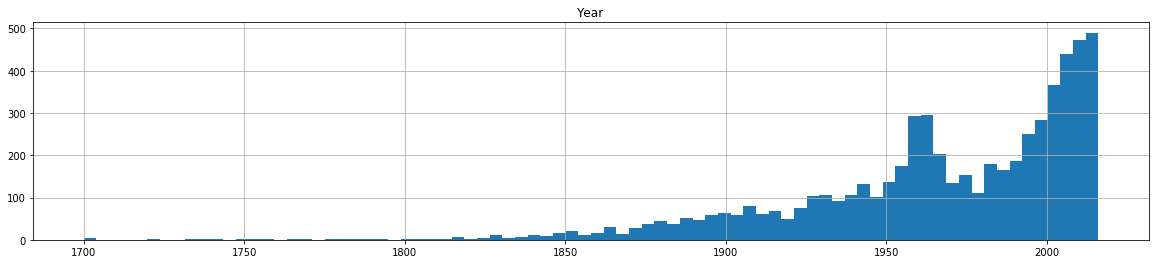

In [45]:
df3=df.sort_values(by=['Year'])
df3['Year'] = df['Year'].str.replace("Unknown","0")
df3.drop( df3[ df3['Year'].str.isnumeric() ==False].index , inplace=True)

df3['Year']=df3['Year'].astype(int)
df3.drop( df3[ df3['Year']<1700].index , inplace=True)

histograma2 = df3.hist(bins=80,figsize=(20,4))
histograma2